In [2]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = ['Microsoft JHengHei','sans serif']
rcParams['axes.unicode_minus'] = False
teen_phone = pd.read_csv('teen_phone_addiction_dataset.csv',sep = ',')

In [3]:
for col in teen_phone.columns:
    print(f'{col}欄位值')
    print(teen_phone[col].unique())

ID欄位值
[   1    2    3 ... 2998 2999 3000]
Name欄位值
['Shannon Francis' 'Scott Rodriguez' 'Adrian Knox' ... 'Norman Hughes'
 'Barbara Hinton' 'Curtis Johnson']
Age欄位值
[13 17 18 14 16 19 15]
Gender欄位值
['Female' 'Other' 'Male']
Location欄位值
['Hansonfort' 'Theodorefort' 'Lindseystad' ... 'Rebeccaton' 'Ramirezmouth'
 'Lake Alexander']
School_Grade欄位值
['9th' '7th' '11th' '12th' '10th' '8th']
Daily_Usage_Hours欄位值
[ 4.   5.5  5.8  3.1  2.5  3.9  6.3  5.1  3.   4.9  1.6  7.4  8.7  6.4
  4.4  5.4  7.9  2.7  6.9  4.6  6.2  6.6  8.6  4.1  4.2  8.   3.3  4.7
  8.3  1.7  5.2  1.   6.7  7.1  8.1  4.3  9.   4.5  5.9  2.9  3.4  3.7
  5.3  6.8  7.   6.5  4.8  7.6  3.8  7.3  0.7  7.2  2.8  2.2  5.6  2.
  3.6  2.1  7.8  2.6  7.7  0.   5.   5.7  6.   8.4  0.8  2.4  1.8  0.2
  7.5  0.5  8.5  3.5  6.1  8.8  8.9 10.6  9.7  8.2  3.2  9.2  1.9  1.4
 10.2  1.1  9.3  0.4  2.3  9.1  1.5 10.5  0.6 11.   0.3  1.3  0.9  9.4
  9.5  9.8  1.2 10.3 10.1 10.9  0.1 11.2 11.5]
Sleep_Hours欄位值
[ 6.1  6.5  5.5  3.9  6.7  6.3  9.1

In [4]:
teen_phone.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [5]:
df = teen_phone.drop(columns = ['ID','Name','Location'])

探索性分析

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   School_Grade            3000 non-null   object 
 3   Daily_Usage_Hours       3000 non-null   float64
 4   Sleep_Hours             3000 non-null   float64
 5   Academic_Performance    3000 non-null   int64  
 6   Social_Interactions     3000 non-null   int64  
 7   Exercise_Hours          3000 non-null   float64
 8   Anxiety_Level           3000 non-null   int64  
 9   Depression_Level        3000 non-null   int64  
 10  Self_Esteem             3000 non-null   int64  
 11  Parental_Control        3000 non-null   int64  
 12  Screen_Time_Before_Bed  3000 non-null   float64
 13  Phone_Checks_Per_Day    3000 non-null   int64  
 14  Apps_Used_Daily         3000 non-null   

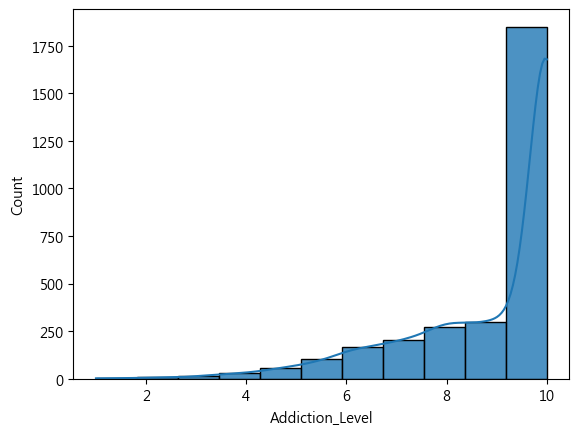

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Addiction_Level'],bins = 11, kde = True,alpha = 0.8);

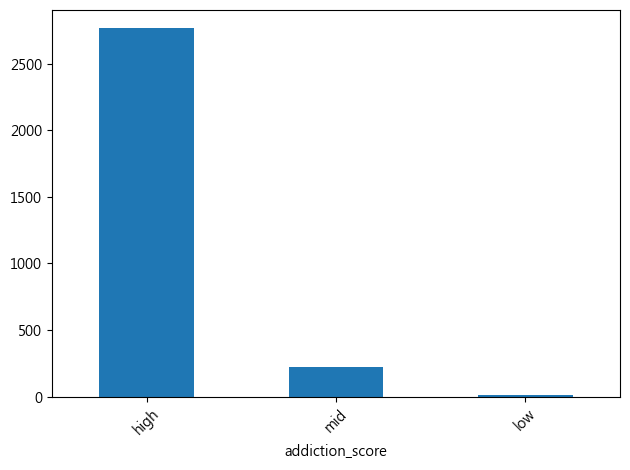

In [9]:
def addiction_score(score):
    if score <= 3 :
        return 'low'
    elif score <= 6:
        return 'mid'
    else :
        return 'high'
df['addiction_score'] = df['Addiction_Level'].apply(addiction_score)
df['addiction_score'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

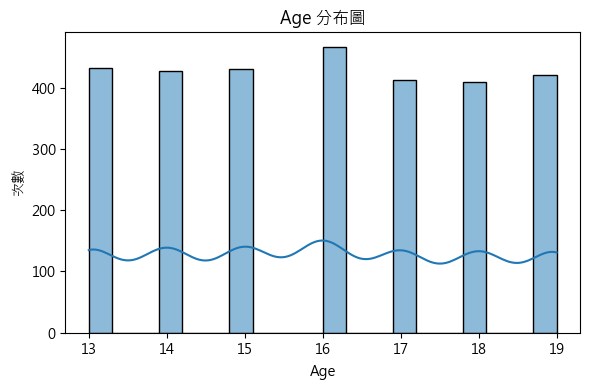

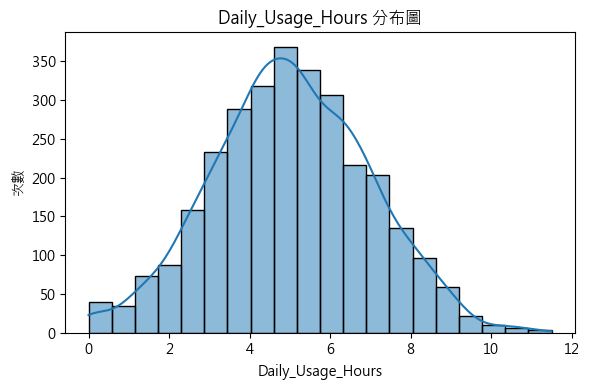

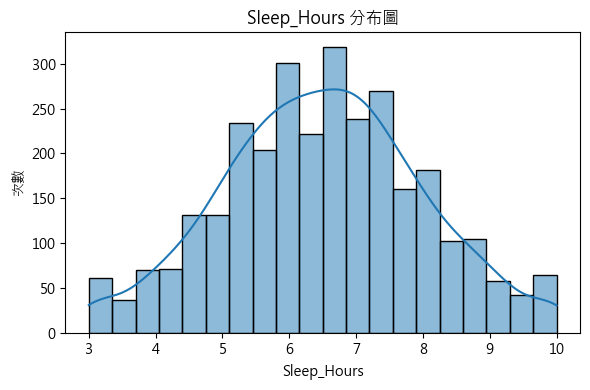

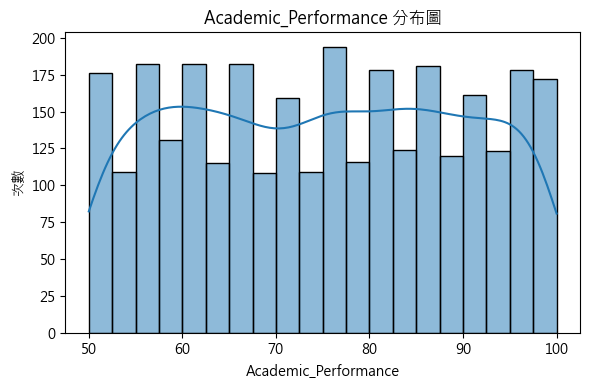

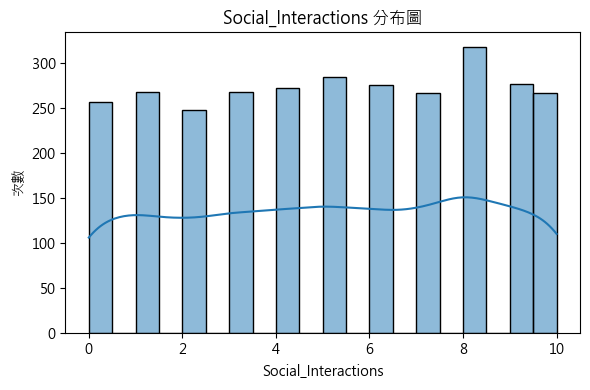

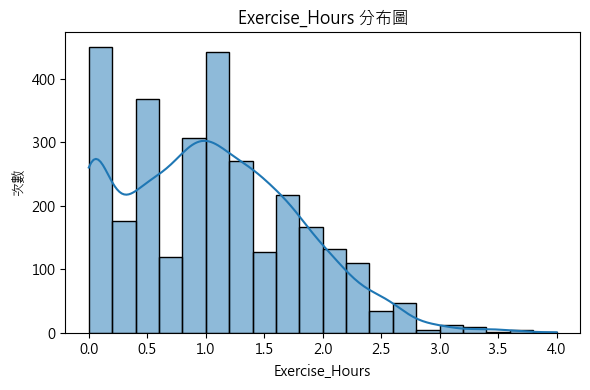

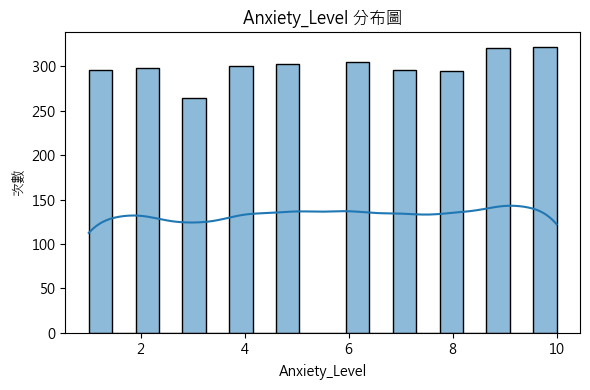

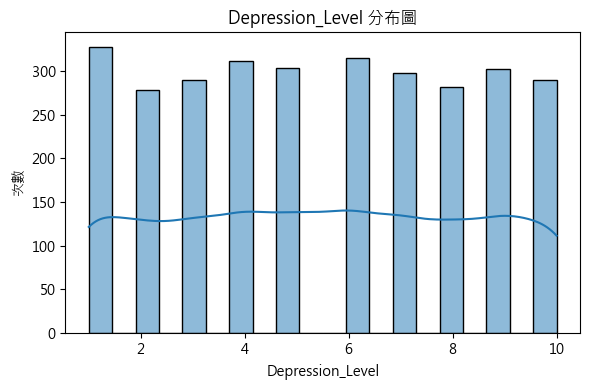

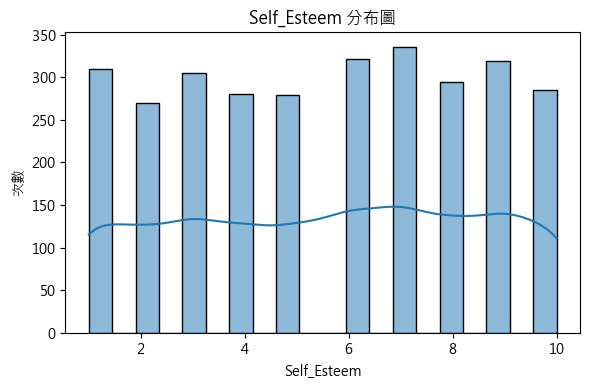

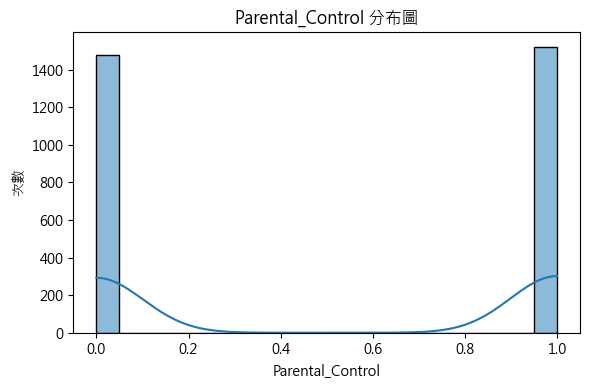

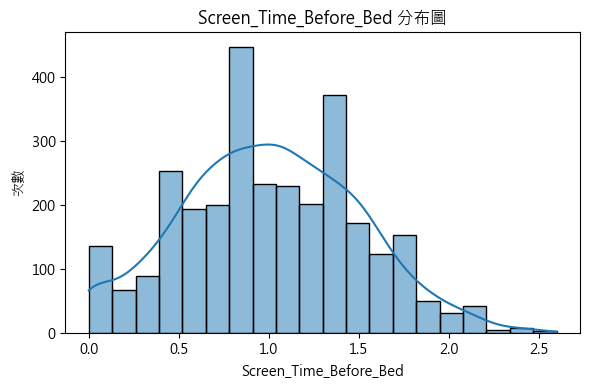

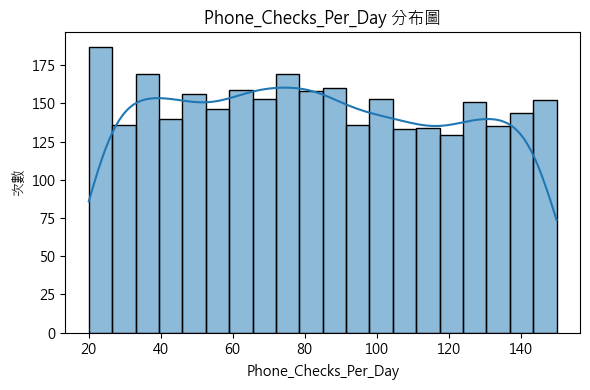

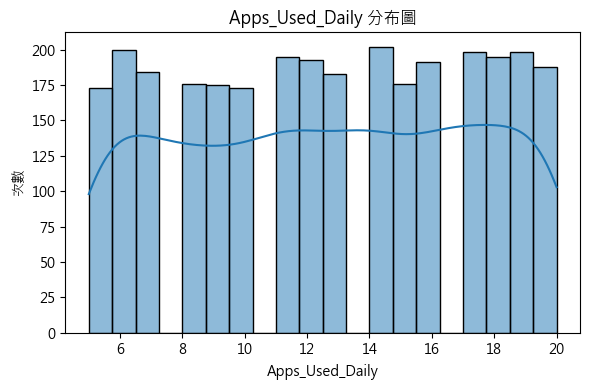

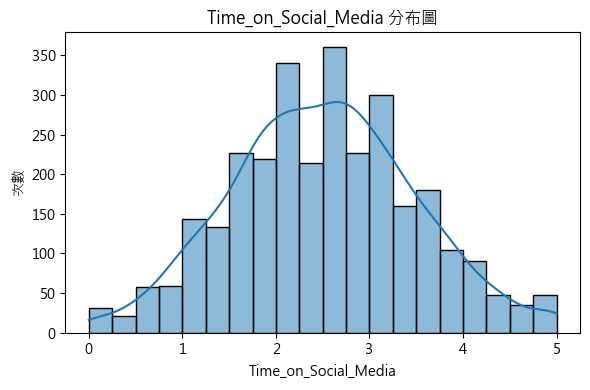

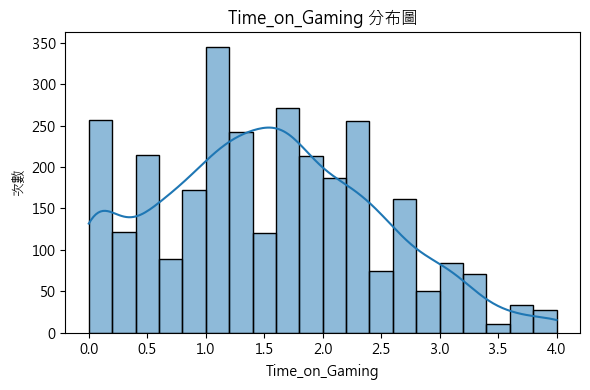

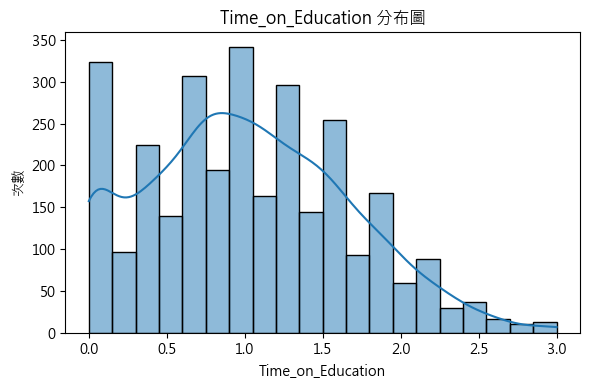

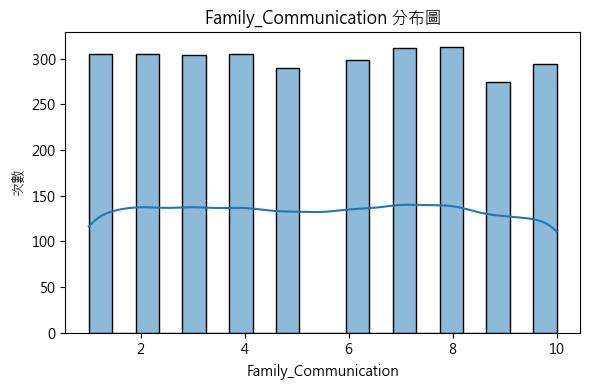

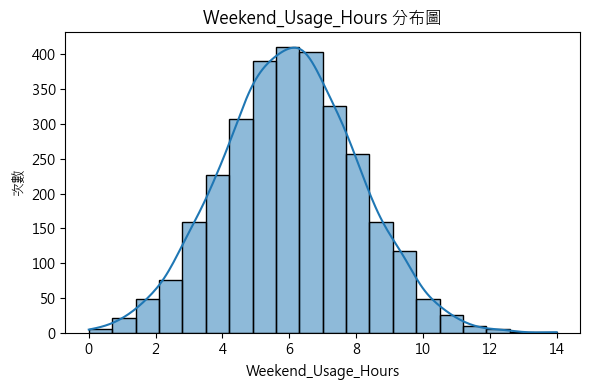

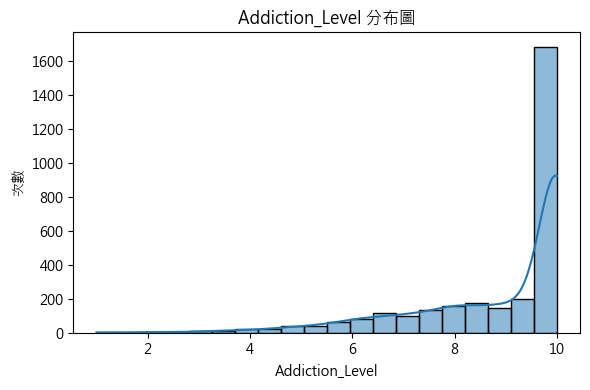

In [10]:
#呈現數值欄位
num_cols = df.select_dtypes(include = ['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col],bins = 20,kde = True)
    plt.title(f'{col} 分布圖')
    plt.xlabel(col)
    plt.ylabel('次數')
    plt.tight_layout()
    plt.show()

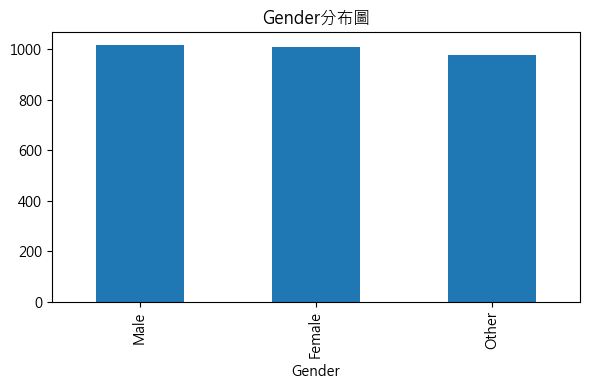

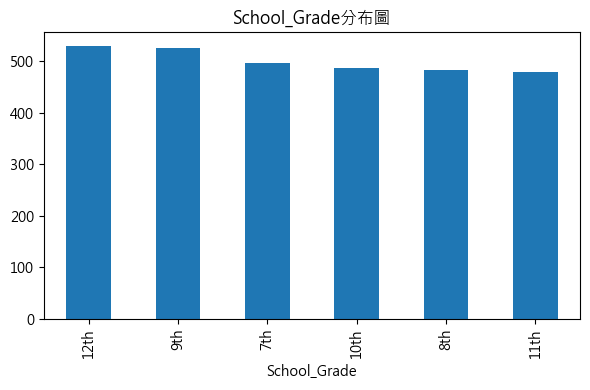

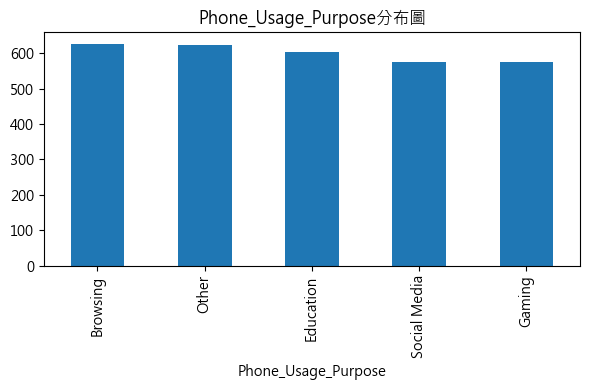

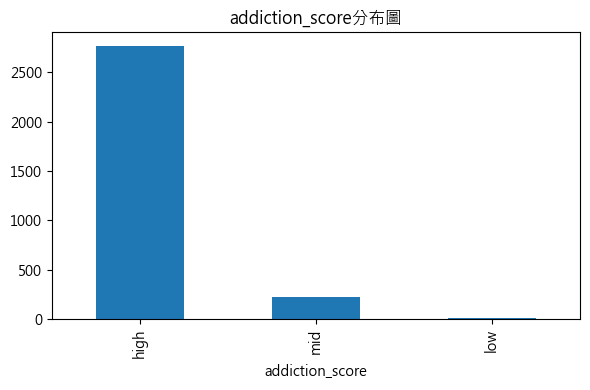

In [11]:
#呈現類別欄位
obj_col = df.select_dtypes(include = ['object']).columns
for col in obj_col:
    plt.figure(figsize = (6,4))
    df[col].value_counts().plot(kind = 'bar')
    plt.xlabel(col)
    plt.title(f'{col}分布圖')
    plt.tight_layout()
    plt.show()

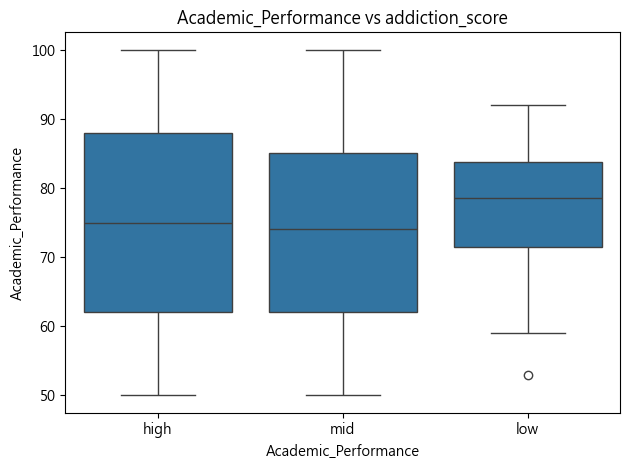

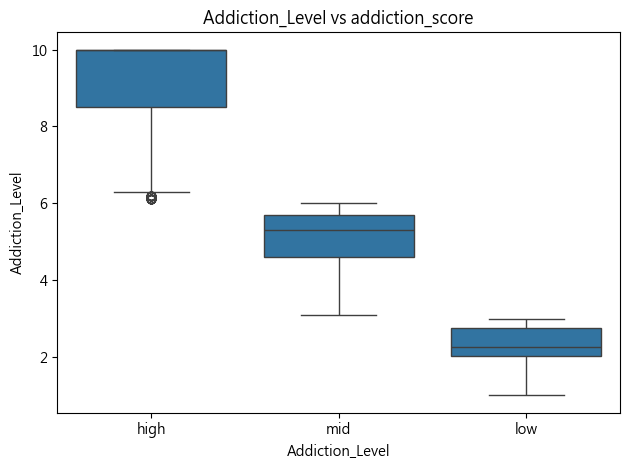

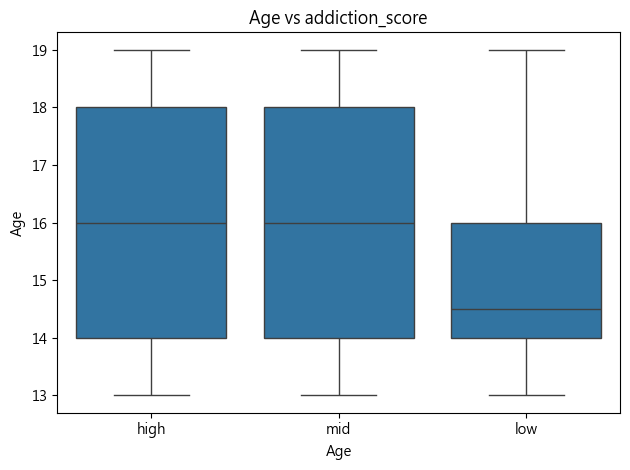

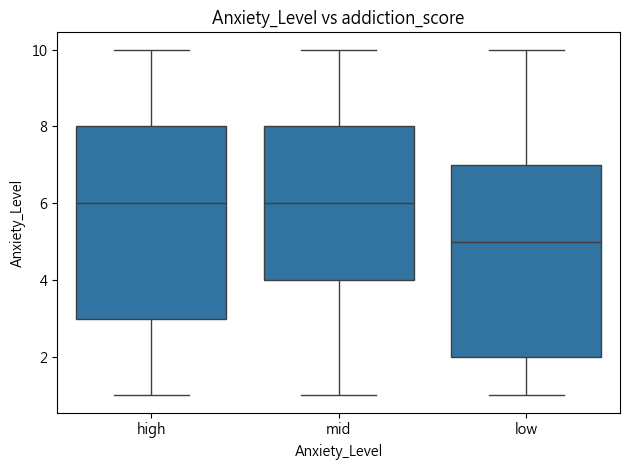

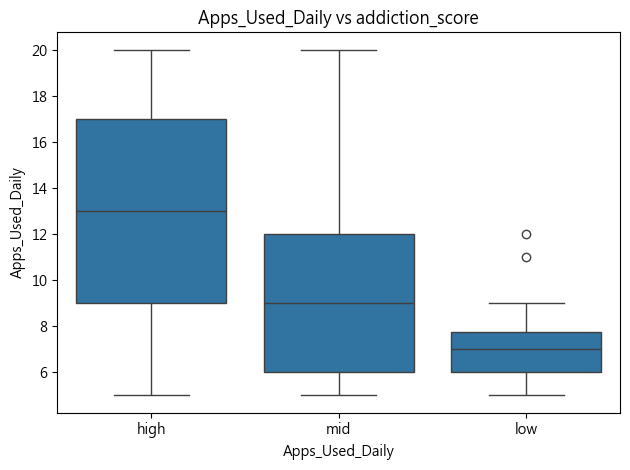

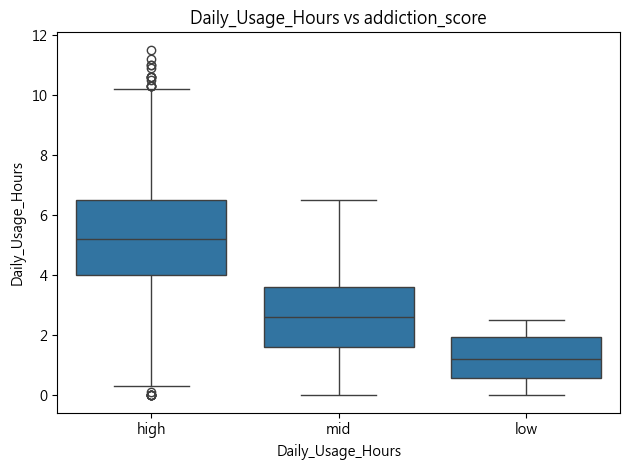

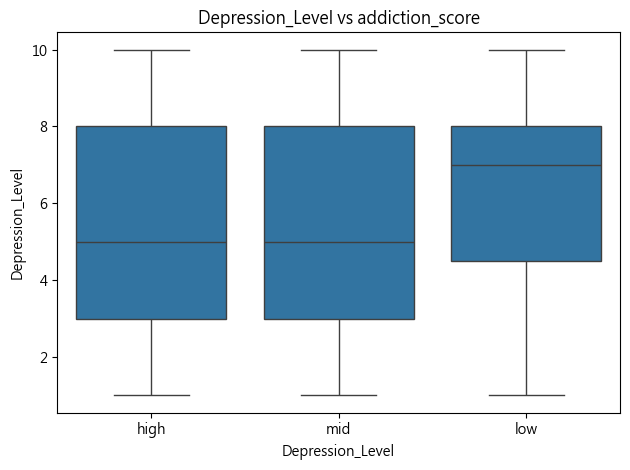

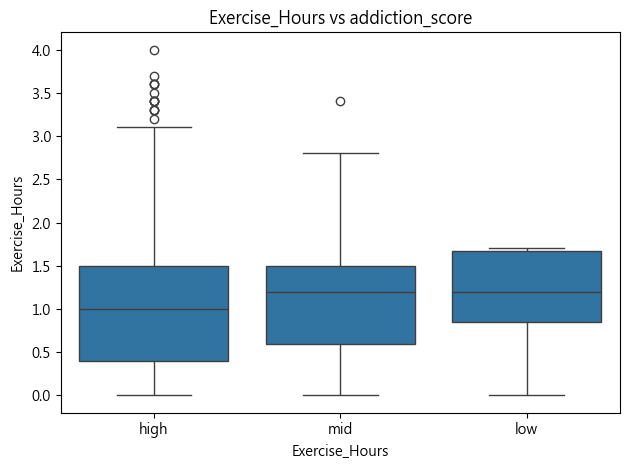

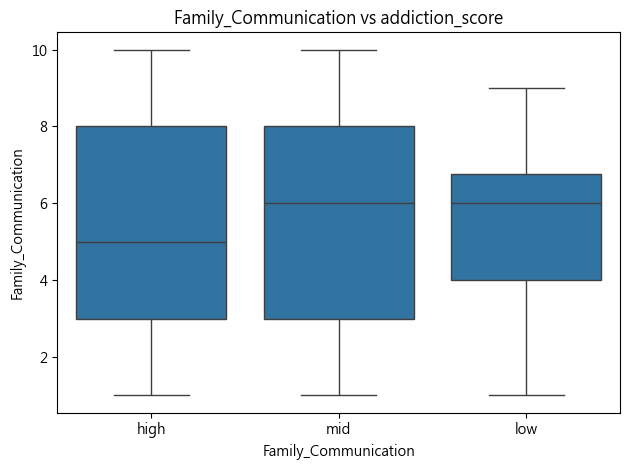

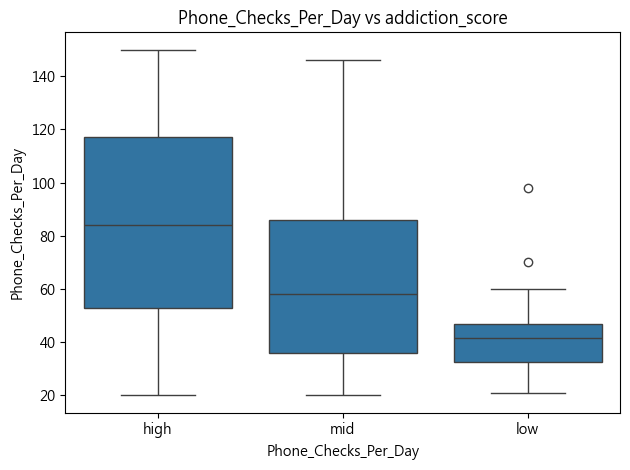

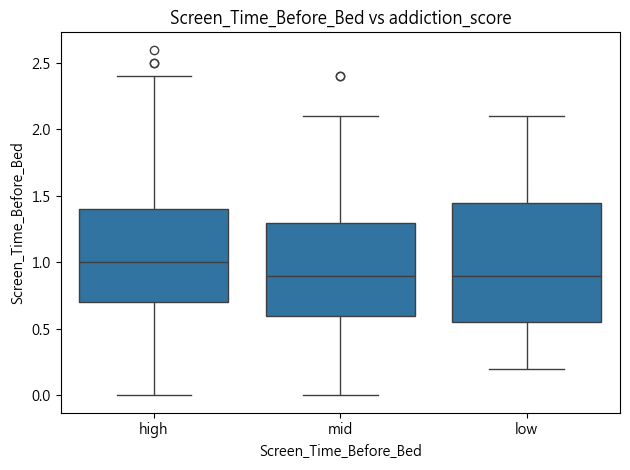

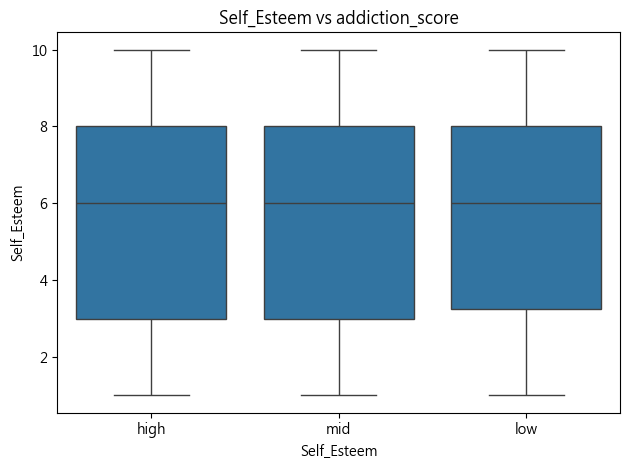

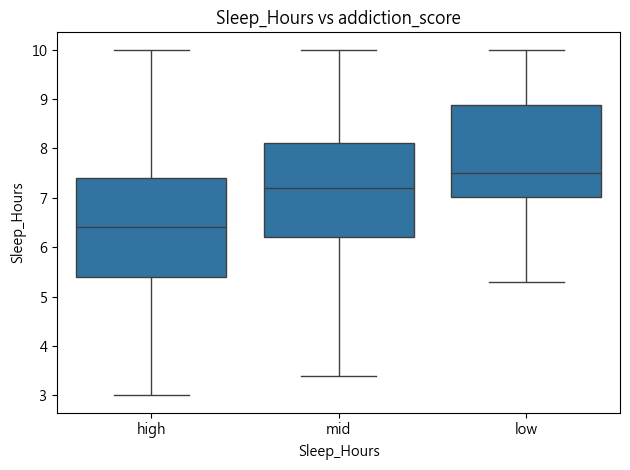

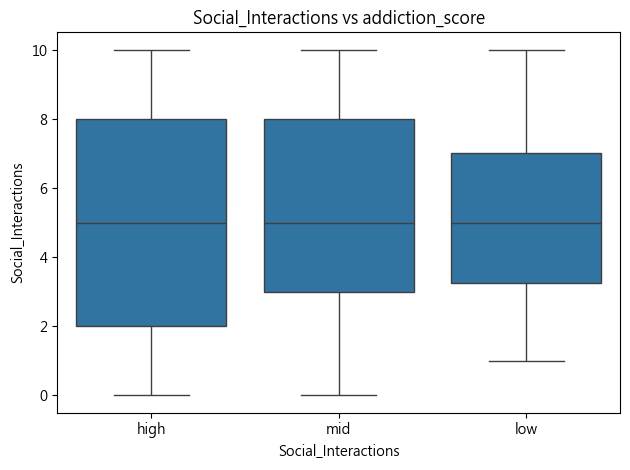

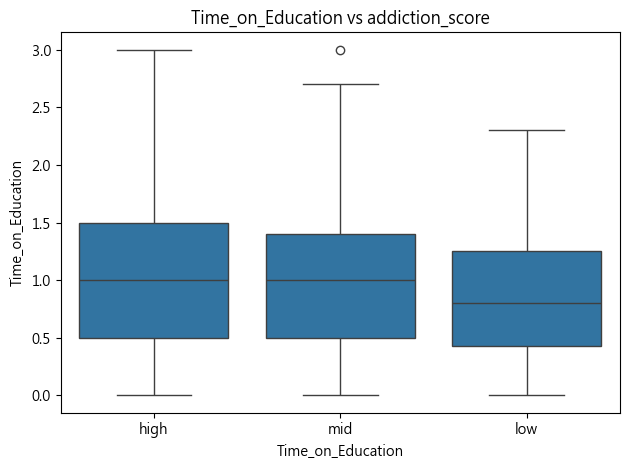

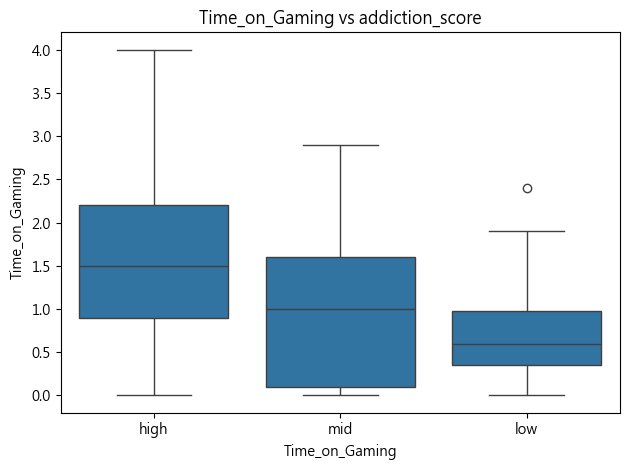

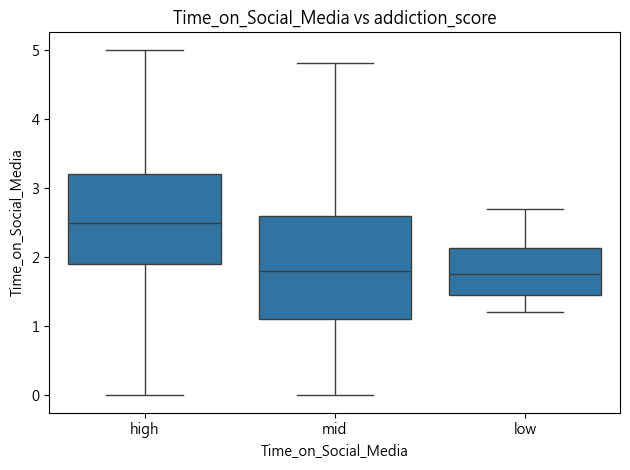

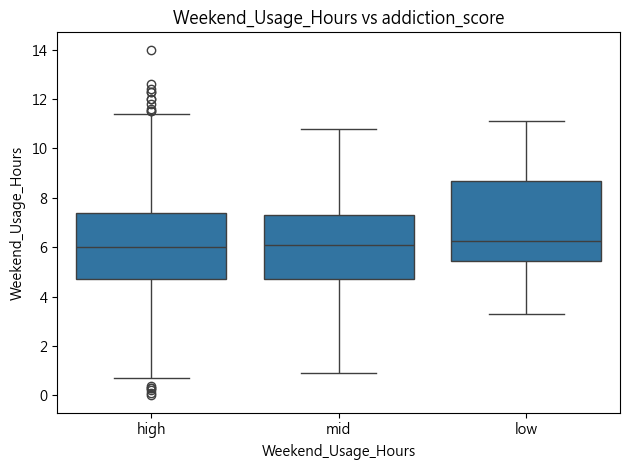

In [12]:
#單一欄位跟成癮分數欄位做對比(排除addiction level跟parents control)
exclude = ['Addiction Level','Parental_Control']
num_col_2 = df.select_dtypes(include = ['int64','float64']).columns.difference(exclude)
for col in num_col_2:
    sns.boxplot(data = df, x = 'addiction_score',y = col)
    plt.xlabel(col)
    plt.title(f'{col} vs addiction_score')
    plt.tight_layout()
    plt.show()

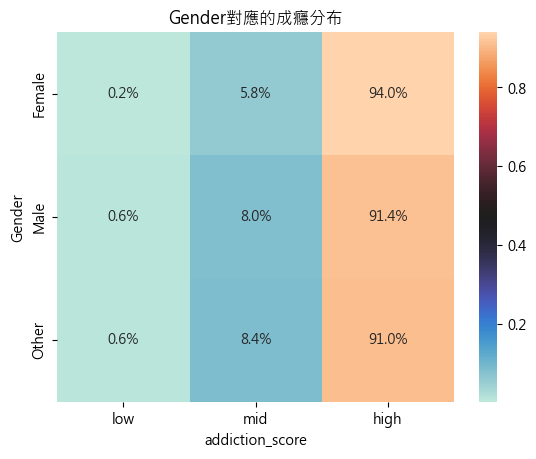

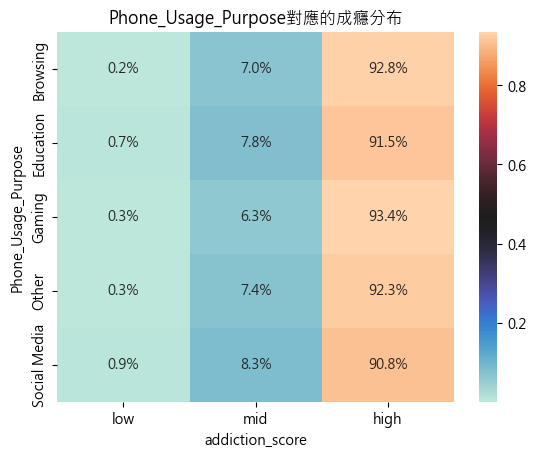

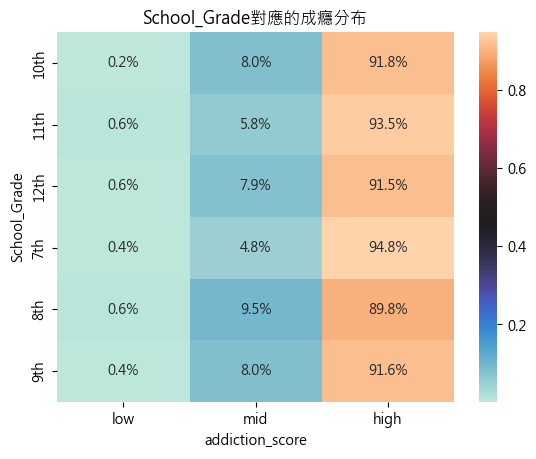

In [13]:
#不同類別變數跟成癮分數的對比
import seaborn as sns
exclude = ['addiction_score']
obj_col = df.select_dtypes(include = ['object']).columns.difference(exclude)
for col in obj_col:
    obj_crosstab = pd.crosstab(df[col],df['addiction_score'],normalize = 'index')
    index = ['low','mid','high']
    heatdf = obj_crosstab.reindex(columns = index)
    sns.heatmap(heatdf,annot = True,fmt = '.1%',cmap = 'icefire')
    plt.title(f'{col}對應的成癮分布')
    plt.show()

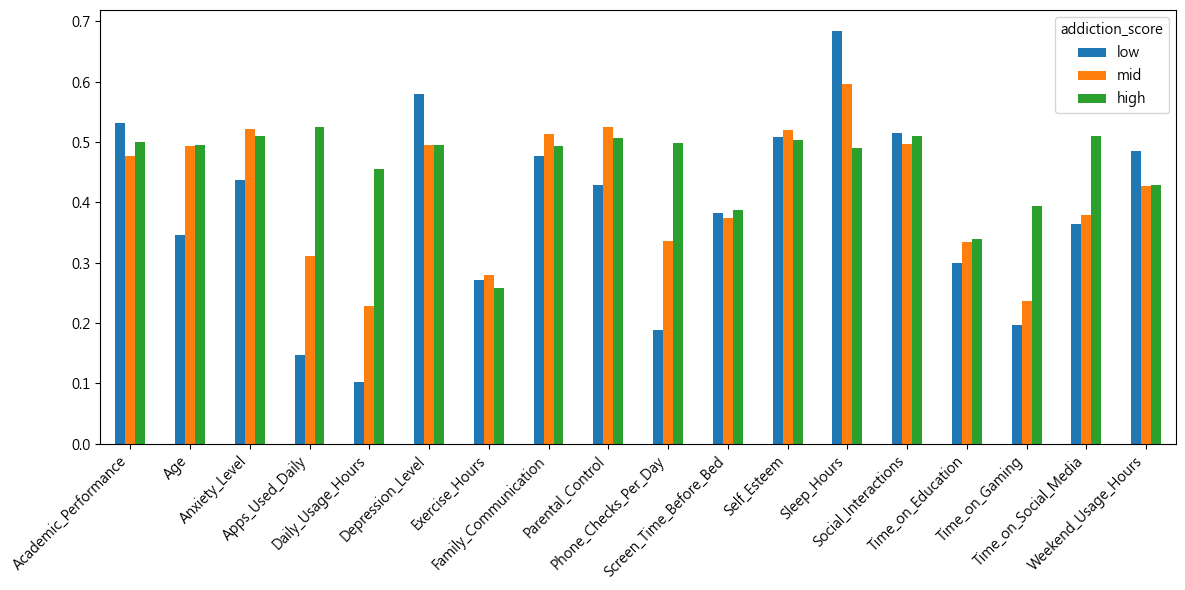

In [14]:
#使用標準化來呈現圖表
from sklearn.preprocessing import MinMaxScaler
exclude = ['Addiction_Level']
num_col = df.select_dtypes(include = ['int64','float64']).columns.difference(exclude)
#進行正規化
scaler = MinMaxScaler()
df_scaled = df
df_scaled[num_col] = scaler.fit_transform(df[num_col])
#分組平均、畫圖
grouped = df_scaled.groupby('addiction_score')[num_col].mean()
group_index = ['low','mid','high']
grouped = grouped.reindex(group_index)
grouped.T.plot(kind = 'bar',align = 'center',figsize = (12,6))
plt.xticks(rotation = 45,ha = 'right')
plt.tight_layout()
plt.show()

統計分析

In [16]:
#計算個數值欄位的皮爾森相關係數跟顯著性(p值)
from scipy.stats import pearsonr
import pandas as pd
target = ['Addiction_Level']
num_col = df.select_dtypes(include = ['int64','float64']).columns.difference(target)

results = []
for col in num_col:
    r,p = pearsonr(df['Addiction_Level'],df[col])
    results.append({'變數': col,'相關係數' : r,'p值' : p})
df_corr_p = pd.DataFrame(results)
df_corr_p['顯著性'] = df_corr_p['p值']. apply(lambda x : '極度顯著' if x < 0.001 else '非常顯著' if x < 0.01 else '顯著' if x < 0.05 else '不顯著')
df_corr_p = df_corr_p.sort_values(by = 'p值',key = abs , ascending = True)
df_corr_p

,變數,相關係數,p值,顯著性
4,Daily_Usage_Hours,0.600771,8.061434e-294,極度顯著
3,Apps_Used_Daily,0.319287,4.567902e-72,極度顯著
16,Time_on_Social_Media,0.306578,2.616866e-66,極度顯著
15,Time_on_Gaming,0.273060,1.907292e-52,極度顯著
9,Phone_Checks_Per_Day,0.246342,1.033363e-42,極度顯著
12,Sleep_Hours,-0.216681,3.301597e-33,極度顯著
1,Age,0.031306,8.645248e-02,不顯著
11,Self_Esteem,-0.022292,2.222349e-01,不顯著
6,Exercise_Hours,-0.021015,2.498641e-01,不顯著
2,Anxiety_Level,0.016005,3.808432e-01,不顯著


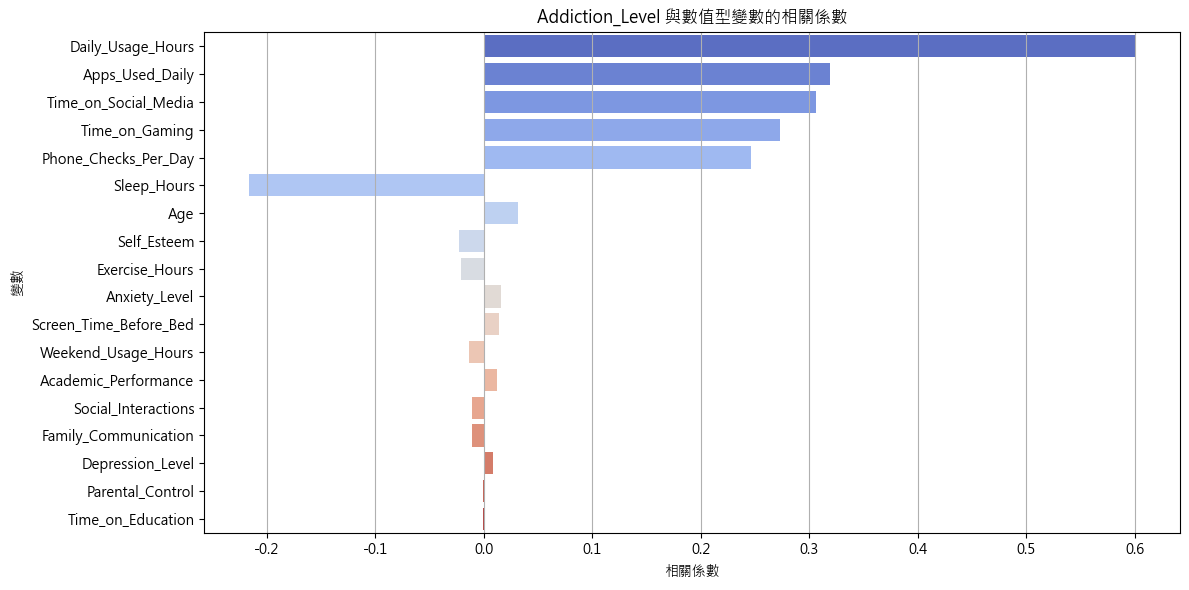

In [17]:
#畫相關性圖
num_corr = df.corr(numeric_only = True)
target_corr = num_corr['Addiction_Level'].drop('Addiction_Level')
target_corr = target_corr.reindex(target_corr.abs().sort_values(ascending = False).index)
plt.figure(figsize = (12,6))
sns.barplot(x = target_corr.values,y = target_corr.index,hue = target_corr.index,palette = 'coolwarm',legend = False)
plt.title('Addiction_Level 與數值型變數的相關係數')
plt.xlabel("相關係數")
plt.ylabel("變數")
plt.grid(True,axis = 'x')
plt.tight_layout()
plt.show()

In [18]:
#計算類別型變數的carmer's v
from scipy.stats import chi2_contingency
cat_cols = ['Gender','School_Grade','Phone_Usage_Purpose']
results = {}
for col in cat_cols:
    table = pd.crosstab(df[col],df['addiction_score'])
    chi2,p, dof,expected = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape)-1
    cramers_v = np.sqrt(chi2/(n*min_dim))
    results[col] = {'Carmers_V': cramers_v,'p_value':p}

results_df = pd.DataFrame(results).T
results_df

,Carmers_V,p_value
Gender,0.037332,0.079181
School_Grade,0.044709,0.285486
Phone_Usage_Purpose,0.032766,0.597875


模型建模

In [26]:
#隨機森林建模
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.utils.class_weight import compute_sample_weight

#定義模型建模
def train(x,y,model_name = 'RandomForest'):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state = 42,class_weight = 'balanced')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
    elif model_name == 'XGBoost':
        sample_weights = compute_sample_weight(class_weight = 'balanced' , y = y_train)
        model = XGBClassifier(random_state = 42,eval_metric = 'mlogloss')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
    results = {
        'model':model,
        'accuracy': accuracy_score(y_test,y_pred),
        'f1_score': f1_score(y_test, y_pred, average = 'macro'),
        'report': classification_report(y_test,y_pred,zero_division = 0)
    }
    return results

In [28]:
#定義目標函數
y = df['addiction_score']

#模型A :六個高相關特徵
#先建立字典做轉換
score_map = {'low':0,'mid':1,'high':2}
df['addiction_level'] = df['addiction_score'].map(score_map)
top_cor_feature = ['Daily_Usage_Hours','Sleep_Hours','Apps_Used_Daily','Time_on_Gaming','Time_on_Social_Media','Phone_Checks_Per_Day']

x_A = df[top_cor_feature]
result_A = train(x_A , y , model_name = 'RandomForest')
results_A = pd.DataFrame({
    'model':['top 6 correlation'],
    'accuracy':[result_A['accuracy']],
    'f1_score':[result_A['f1_score']]
})
#模型B :全部特徵
df_features = df.drop(['Addiction_Level','addiction_score','addiction_level'],axis = 1)
df_encoded = pd.get_dummies(df_features,drop_first = True).copy()
x_B = df_encoded
result_B = train(x_B, y , model_name = 'RandomForest')
results_B = pd.DataFrame({
    'model': ['All features'],
    'accuracy': [result_B['accuracy']],
    'f1_score':[result_B['f1_score']]
})
#模型C: 模型 B 的 feature importance 選出前 10 個變數再訓練
importances = pd.Series(result_B['model'].feature_importances_ , index = x_B.columns)
top10_features = importances.sort_values(ascending = False).head(10).index.tolist()
x_C = df_encoded[top10_features]
result_C = train(x_C , y , model_name = 'RandomForest')
results_C = pd.DataFrame({
    'model': ['top 10 importance'],
    'accuracy': [result_C['accuracy']],
    'f1_score' : [result_C['f1_score']]
})

all_result = pd.DataFrame({
    'model':['top 6 correlation','All features','top 10 importance'],
    'accuracy' :[result_A['accuracy'] , result_B['accuracy'] , result_C['accuracy']],
    'f1_score' :[result_A['f1_score'] , result_B['f1_score'] , result_C['f1_score']]
})
print("Model A report :\n",result_A['report'])
print()
print("Model B report :\n",result_B['report'])
print()
print("Model C report :\n",result_C['report'])
print()
print(all_result)


Model A report :
               precision    recall  f1-score   support

        high       0.95      1.00      0.98       553
         low       0.00      0.00      0.00         3
         mid       0.84      0.36      0.51        44

    accuracy                           0.95       600
   macro avg       0.60      0.45      0.49       600
weighted avg       0.94      0.95      0.94       600


Model B report :
               precision    recall  f1-score   support

        high       0.92      1.00      0.96       553
         low       0.00      0.00      0.00         3
         mid       1.00      0.05      0.09        44

    accuracy                           0.93       600
   macro avg       0.64      0.35      0.35       600
weighted avg       0.93      0.93      0.89       600


Model C report :
               precision    recall  f1-score   support

        high       0.94      1.00      0.97       553
         low       0.00      0.00      0.00         3
         mid       

In [29]:
# XGBoost建模結果
#模型A
score_map = {'low':0,'mid':1,'high':2}
df['addiction_level'] = df['addiction_score'].map(score_map)
top_cor_feature = ['Daily_Usage_Hours','Sleep_Hours','Apps_Used_Daily','Time_on_Gaming','Time_on_Social_Media','Phone_Checks_Per_Day']
y = df['addiction_level']
x_A = df[top_cor_feature]
A_result_xgb = train(x_A , y , model_name = 'XGBoost')
A_results_xgb = {
    'model':['top 6 correlation'],
    'accuracy':[A_result_xgb['accuracy']],
    'f1_score':[A_result_xgb['f1_score']]
}
#模型B
df_features = df.drop(['Addiction_Level','addiction_score','addiction_level'],axis = 1)
df_encoded = pd.get_dummies(df_features,drop_first = True).copy()
x_B = df_encoded
B_result_xgb = train(x_B , y ,model_name = 'XGBoost')
B_results_xgb = {
    'model':['All features'],
    'accuracy':[B_result_xgb['accuracy']],
    'f1_score':[B_result_xgb['f1_score']]
}
#模型C
importances = pd.Series(result_B['model'].feature_importances_ , index = x_B.columns)
top10_features = importances.sort_values(ascending = False).head(10).index.tolist()
x_C = df_encoded[top10_features]
C_result_xgb = train(x_C, y, model_name = 'XGBoost')
C_results_xgb = {
    'model':['top 10 importance'],
    'accuracy':[C_result_xgb['accuracy']],
    'f1_score':[C_result_xgb['f1_score']]
}
all_results = pd.DataFrame({
    'model':['top 6 correlation','All features','top 10 importance'],
    'accuracy':[A_result_xgb['accuracy'],B_result_xgb['accuracy'],C_result_xgb['accuracy']],
    'f1_score':[A_result_xgb['f1_score'],B_result_xgb['f1_score'],C_result_xgb['f1_score']]
})
print("Model A report :\n",A_result_xgb['report'])
print()
print("Model B report :\n",B_result_xgb['report'])
print()
print("Model C report :\n",C_result_xgb['report'])
print()
print(all_result)

Model A report :
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.90      0.61      0.73        44
           2       0.97      1.00      0.98       553

    accuracy                           0.97       600
   macro avg       0.96      0.65      0.74       600
weighted avg       0.97      0.97      0.96       600


Model B report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.59      0.70        44
           2       0.97      1.00      0.98       553

    accuracy                           0.96       600
   macro avg       0.61      0.53      0.56       600
weighted avg       0.96      0.96      0.96       600


Model C report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.57      0.69        44
           2       

In [32]:
# 隨機森林 - 交叉驗證
from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score ,f1_score, classification_report
import numpy as np

def train_cv(x,y,model_name = 'RandomForest',cv_folds = 5):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state = 42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state = 42,eval_metric = 'mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    #建立交叉驗證器
    cv = StratifiedKFold(n_splits = cv_folds, shuffle = True,random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    for train_idx, test_idx in cv.split(x,y):
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train , y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred,average = 'macro',zero_division = 0))
        recall.append(recall_score(y_test,y_pred, average = 'macro',zero_division = 0))
        f1_scores.append(f1_score(y_test,y_pred,average = 'macro',zero_division = 0))

        results = {
            'model':model,
            'cv_accuracy':np.mean(accuracy),
            'cv_recall':np.mean(recall),
            'cv_precision':np.mean(precision),
            'cv_f1_score':np.mean(f1_scores),
            'report':classification_report(y_test,y_pred,zero_division = 0)
        }
    return results
x_A = df[top_cor_feature]
result_A_cv = train_cv(x_A ,y , model_name = 'RandomForest')
print("Model A Classification Report:\n", result_A_cv['report'])
x_B = df_encoded
result_B_cv = train_cv(x_B , y, model_name = 'RandomForest')
print("Model B Classification Report:\n", result_B_cv['report'])
x_C = df_encoded[top10_features]
result_C_cv = train_cv(x_C, y , model_name = 'RandomForest')
print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_score']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_score']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_score']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.52      0.64        44
           2       0.96      1.00      0.98       553

    accuracy                           0.96       600
   macro avg       0.59      0.51      0.54       600
weighted avg       0.95      0.96      0.95       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.09      0.16        44
           2       0.93      1.00      0.96       553

    accuracy                           0.93       600
   macro avg       0.53      0.36      0.37       600
weighted avg       0.91      0.93      0.90       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.79      0.34

In [33]:
# XGBoost - 交叉驗證
x_A = df[top_cor_feature]
result_A_cv = train_cv(x_A ,y , model_name = 'XGBoost')
print("Model A Classification Report:\n", result_A_cv['report'])
x_B = df_encoded
result_B_cv = train_cv(x_B , y, model_name = 'XGBoost')
print("Model B Classification Report:\n", result_B_cv['report'])
x_C = df_encoded[top10_features]
result_C_cv = train_cv(x_C, y , model_name = 'XGBoost')
print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_score']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_score']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_score']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      0.80      0.80        44
           2       0.98      0.99      0.99       553

    accuracy                           0.97       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.97      0.97      0.97       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.66      0.73        44
           2       0.98      0.99      0.98       553

    accuracy                           0.96       600
   macro avg       0.60      0.55      0.57       600
weighted avg       0.96      0.96      0.96       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.68

In [47]:
#隨機森林 - 交叉驗證(使用use_smote處理不平衡)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from imblearn.over_sampling import SMOTE
def train_smote(x, y, model_name = 'RandomForest',cv_folds = 5,use_smote = False):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state = 42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state = 42,eval_metric = 'mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    cv = StratifiedKFold(n_splits = cv_folds , shuffle = True ,random_state = 42)
    accuracy = []
    precision = []
    recall = []
    f1_scores = []
    
    for train_idx , test_idx in cv.split(x,y):
        x_train , x_test = x.iloc[train_idx],x.iloc[test_idx]
        y_train , y_test = y.iloc[train_idx],y.iloc[test_idx]
        if use_smote:
            sm = SMOTE(random_state = 42)
            x_train, y_train = sm.fit_resample(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred,average = 'macro',zero_division = 0))
        recall.append(recall_score(y_test, y_pred, average = 'macro',zero_division = 0))
        f1_scores.append(f1_score(y_test, y_pred, average = 'macro',zero_division = 0))

        results = {
            'model':model,
            'accuracy_smote':np.mean(accuracy),
            'precision_smote':np.mean(precision),
            'recall_smote':np.mean(recall),
            'f1_score_smote':np.mean(f1_scores),
            'report':classification_report(y_test, y_pred, zero_division = 0)
        }
        return results
x_A = df[top_cor_feature]
result_A_smote = train_smote(x_A, y , model_name = 'RandomForest',use_smote = True)
print("Model A Classification Report:\n", result_A_smote['report'])

x_B = df_encoded
result_B_smote = train_smote(x_B, y ,model_name = 'RandomForest',use_smote = True)
print("Model B Classification Report:\n", result_B_smote['report'])

x_C = df_encoded[top10_features]
result_C_smote = train_smote(x_C , y ,model_name = 'RandomForest',use_smote = True)
print("Model C Classification Report:\n", result_C_smote['report'])

print(f'Model A 平均precision : {result_A_smote['accuracy_smote']:.4f}')
print(f'Model A 平均recall : {result_A_smote['recall_smote']:.4f}')
print(f'Model A 平均f1 score : {result_A_smote['f1_score_smote']:.4f}')
print(f'Model A 平均accuracy : {result_A_smote['accuracy_smote']:.4f}')
print()
print(f'Model B 平均precision : {result_B_smote['accuracy_smote']:.4f}')
print(f'Model B 平均recall : {result_B_smote['recall_smote']:.4f}')
print(f'Model B 平均f1 score : {result_B_smote['f1_score_smote']:.4f}')
print(f'Model B 平均accuracy : {result_B_smote['accuracy_smote']:.4f}')
print()
print(f'Model C 平均precision : {result_C_smote['accuracy_smote']:.4f}')
print(f'Model C 平均recall : {result_C_smote['recall_smote']:.4f}')
print(f'Model C 平均f1 score : {result_C_smote['f1_score_smote']:.4f}')
print(f'Model C 平均accuracy : {result_C_smote['accuracy_smote']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.76      0.71      0.74        45
           2       0.98      0.98      0.98       553

    accuracy                           0.96       600
   macro avg       0.75      0.73      0.74       600
weighted avg       0.96      0.96      0.96       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      0.58      0.64        45
           2       0.97      0.99      0.98       553

    accuracy                           0.95       600
   macro avg       0.56      0.52      0.54       600
weighted avg       0.94      0.95      0.95       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.74      0.71

In [57]:
# XGBoost - 交叉驗證(使用smote處理不平衡)
#模型A
result_A_smote_xgb = train_smote(x_A, y ,model_name = 'XGBoost',use_smote = True)
print("Model A Classification Report:\n", result_A_smote_xgb['report'])
#模型B
result_B_smote_xgb = train_smote(x_B , y , model_name = 'XGBoost',use_smote = True)
print("Model B Classification Report:\n", result_B_smote_xgb['report'])
#模型C
result_C_smote_xgb = train_smote(x_C, y , model_name = 'XGBoost',use_smote = True)
print("Model C Classification Report:\n", result_C_smote_xgb['report'])

print(f'Model A 平均precision :{result_A_smote_xgb['precision_smote']:.4f}')
print(f'Model A 平均recall :{result_A_smote_xgb['recall_smote']:.4f}')
print(f'Model A 平均f1 score:{result_A_smote_xgb['f1_score_smote']:.4f}')
print(f'Model A 平均accuracy:{result_A_smote_xgb['accuracy_smote']:.4f}')
print()
print(f'Model B 平均precision :{result_B_smote_xgb['precision_smote']:.4f}')
print(f'Model B 平均recall :{result_B_smote_xgb['recall_smote']:.4f}')
print(f'Model B 平均f1 score:{result_B_smote_xgb['f1_score_smote']:.4f}')
print(f'Model B 平均accuracy:{result_B_smote_xgb['accuracy_smote']:.4f}')
print()
print(f'Model C 平均precision :{result_C_smote_xgb['precision_smote']:.4f}')
print(f'Model C 平均recall :{result_C_smote_xgb['recall_smote']:.4f}')
print(f'Model C 平均f1 score:{result_C_smote_xgb['f1_score_smote']:.4f}')
print(f'Model C 平均accuracy:{result_C_smote_xgb['accuracy_smote']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.79      0.69      0.74        45
           2       0.98      0.99      0.98       553

    accuracy                           0.96       600
   macro avg       0.68      0.73      0.69       600
weighted avg       0.96      0.96      0.96       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.79      0.73      0.76        45
           2       0.98      0.99      0.98       553

    accuracy                           0.96       600
   macro avg       0.76      0.74      0.75       600
weighted avg       0.96      0.96      0.96       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.78      0.71